Aula 01


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [ ]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [ ]:
df.shape

(133349, 11)

In [ ]:
linhas, colunas = df.shape[0],df.shape[1]
print("Linhas:",linhas)
print("Colunas:", colunas)

Linhas: 133349
Colunas: 11


In [ ]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [ ]:
df["experience_level"].value_counts()

,count
experience_level,
SE,77241
MI,40465
EN,12443
EX,3200


In [ ]:
df["job_title"].value_counts()

,count
job_title,
Data Scientist,17314
Software Engineer,15007
Data Engineer,14868
Data Analyst,12381
Engineer,9456
...,...
Quantitative Research Analyst,1
Data Science Tech Lead,1
Staff Machine Learning Engineer,1


In [ ]:
df["employment_type"].value_counts()

,count
employment_type,
FT,132563
CT,394
PT,376
FL,16


In [ ]:
df.rename(columns={
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}, inplace=True)
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [ ]:
#Colocando os itens de senioridade em portugues

senioridade = {
    'SE': 'Senior',
    'MI': 'Pleno',
    'EN': 'Junior',
    'EX': 'Executivo'
}
df['senioridade'] = df['senioridade'].replace(senioridade)
df["senioridade"].value_counts()

,count
senioridade,
Senior,77241
Pleno,40465
Junior,12443
Executivo,3200


In [ ]:
contrato = {
    'FT': 'Tempo Integral',
    'CT': 'Contrato Temporário',
    'PT': 'Tempo Parcial',
    'FL': 'Freelancer'
}
df['contrato'] = df['contrato'].replace(contrato)
df['contrato'].value_counts()

,count
contrato,
Tempo Integral,132563
Contrato Temporário,394
Tempo Parcial,376
Freelancer,16


In [ ]:
tamanho_empresa = {
    'S': 'Pequena',
    'M': 'Média',
    'L': 'Grande'
}
df['tamanho_empresa'] = df['tamanho_empresa'].replace(tamanho_empresa)
df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
Média,129561
Grande,3574
Pequena,214


In [ ]:
remoto = {
    0: 'Presencial',
    50: 'Híbrido',
    100: 'Remoto'
}
df['remoto'] = df['remoto'].replace(remoto)
df['remoto'].value_counts()

,count
remoto,
Presencial,105312
Remoto,27718
Híbrido,319


In [ ]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [ ]:
df.describe(include="object")

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Tempo Integral,Data Scientist,USD,US,Presencial,US,Média
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [ ]:
df.describe()

,ano,salario,usd
count,133339.000000,1.333490e+05,133349.000000
mean,2024.358770,1.632833e+05,157617.272098
std,0.680627,2.173860e+05,74288.363097
min,2020.000000,1.400000e+04,15000.000000
25%,2024.000000,1.060200e+05,106000.000000
50%,2024.000000,1.470000e+05,146206.000000
75%,2025.000000,1.990000e+05,198000.000000
max,2025.000000,3.040000e+07,800000.000000


Aula 02

In [ ]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [ ]:
df.isnull().sum() #Mostra a soma dos valores que são nulos

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [ ]:
df['ano'].unique() #Vai trazer os valores unicos dentro da tabela em ano

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [ ]:
df[df.isnull().any(axis=1)] #Pesquisando dentro da base as informações que nao são nulas

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,Senior,Tempo Integral,Product Manager,184500,USD,184500,US,Presencial,US,Média
59692,NaN,Pleno,Tempo Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Média
59710,NaN,Junior,Tempo Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Média
59759,NaN,Senior,Tempo Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Média
59789,NaN,Senior,Tempo Integral,Engineer,112000,USD,112000,US,Presencial,US,Média
131000,NaN,Senior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Média
131006,NaN,Senior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Média
133054,NaN,Junior,Tempo Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Tempo Integral,Data Scientist,130000,USD,130000,US,Híbrido,US,Grande


In [ ]:
#Importando uma biblioteca para manipular números
import numpy as np

#Criando um DataFrame do zero
df_salarios = pd.DataFrame({
    'nome': ['João','Paulo','Maria','Tiago','Zina'],
    'salario': [4000, np.nan, 5000, np.nan, 100000]
})

#Preenchendo com a média dos valores onde é np.nan
#Fillna -> Fill(preencher) + na(valores nulos)
#.mean -> Media / .round(2) -> arredonda para duas casas decimais
df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))

#Calcula a mediana e substitui os nulos pela mediana
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())

df_salarios



,nome,salario,salario_media,salario_mediana
0,João,4000.0,4000.00,4000.0
1,Paulo,NaN,36333.33,5000.0
2,Maria,5000.0,5000.00,5000.0
3,Tiago,NaN,36333.33,5000.0
4,Zina,100000.0,100000.00,100000.0


In [ ]:
#Criando um novo DataFrame
df_temperaturas = pd.DataFrame({
    'dia': ['Segunda','Terça','Quarta','Quinta','Sexta'],
    'temperatura': [30, np.nan, np.nan, 28,27]
})

#O ffil -> Significa que vai completar com o valor anterior (Metodo do Panda)
df_temperaturas['preenchido_ffill'] = df_temperaturas['temperatura'].ffill()
df_temperaturas

,dia,temperatura,preenchido_ffill
0,Segunda,30.0,30.0
1,Terça,NaN,30.0
2,Quarta,NaN,30.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [ ]:
#Criando um novo DataFrame
df_temperaturas = pd.DataFrame({
    'dia': ['Segunda','Terça','Quarta','Quinta','Sexta'],
    'temperatura': [30, np.nan, np.nan, 28,27]
})

#O ffil -> Significa que vai completar com o valor posterior (Metodo do Panda)
df_temperaturas['preenchido_bfill'] = df_temperaturas['temperatura'].bfill()
df_temperaturas

,dia,temperatura,preenchido_bfill
0,Segunda,30.0,30.0
1,Terça,NaN,28.0
2,Quarta,NaN,28.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [ ]:
df_cidades = pd.DataFrame({
    'nome': ['João','Paulo','Maria','Tiago','Zina', 'Carlos'],
    'cidade': ['Rio de Janeiro', 'São Paulo', np.nan, 'Curitiba', np.nan, 'Belém']
})

#Pega os np.nam e transforma em "Não Informado"
df_cidades['cidade_preenchida'] = df_cidades['cidade'].fillna("Não Informado")

df_cidades

,nome,cidade,cidade_preenchida
0,João,Rio de Janeiro,Rio de Janeiro
1,Paulo,São Paulo,São Paulo
2,Maria,NaN,Não Informado
3,Tiago,Curitiba,Curitiba
4,Zina,NaN,Não Informado
5,Carlos,Belém,Belém


In [ ]:
#Removendo da base os itens NaN e armazenando em outra variável
#Metodo dropna()
df_limpo = df.dropna()

#Fazendo a verificação dos sados nulos em uma soma
df_limpo.isnull().sum()


,0
ano,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [ ]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [ ]:
#Observando o porque a variável ano esta como float
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  object 
 8   remoto           133339 non-null  object 
 9   empresa          133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [ ]:
#Transformando o Dtype de 'ano' para inteiro sem alterar os valores
df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype('int64'))

df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ano              133339 non-null  int64 
 1   senioridade      133339 non-null  object
 2   contrato         133339 non-null  object
 3   cargo            133339 non-null  object
 4   salario          133339 non-null  int64 
 5   moeda            133339 non-null  object
 6   usd              133339 non-null  int64 
 7   residencia       133339 non-null  object
 8   remoto           133339 non-null  object
 9   empresa          133339 non-null  object
 10  tamanho_empresa  133339 non-null  object
dtypes: int64(3), object(8)
memory usage: 12.2+ MB


Aula 03 - Criando Gráficos e história com


```
# Isto está formatado como código
```



In [ ]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


<Axes: title={'center': 'Distribuição de Senioridade'}, xlabel='senioridade'>

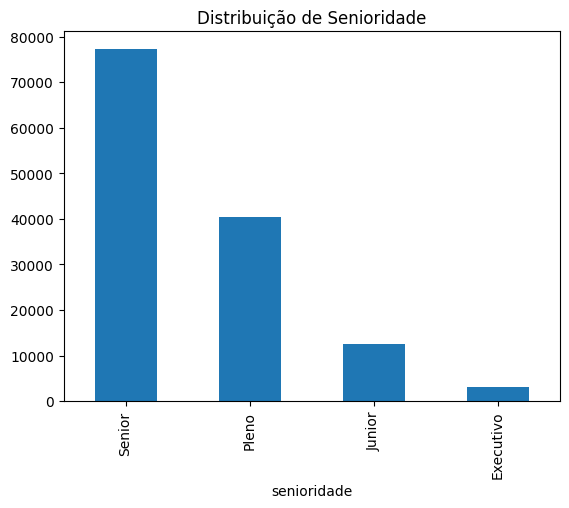

In [ ]:
# .value_counts() -> Calcula a frequencia das catergorias. Chama a base, seleciona o valor e coloca a função count.

# .plot() -> Irá mostrar o gráfico

# title -> Adicionará um título ao gráfico gerado

df_limpo['senioridade'].value_counts().plot(kind='bar', title="Distribuição de Senioridade")

In [ ]:
#Importando outras bibliotecas
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='usd'>

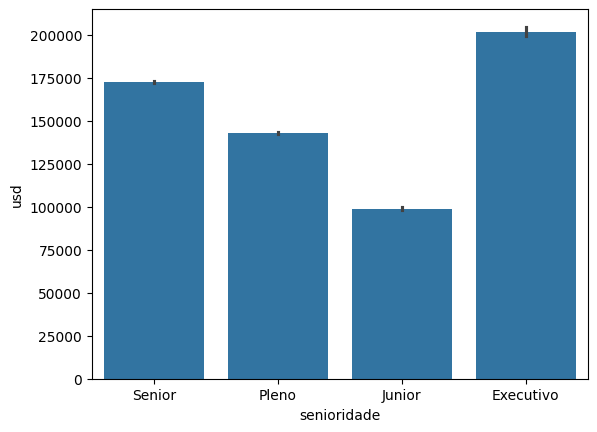

In [ ]:
sns.barplot(data = df_limpo, x='senioridade', y='usd')

In [ ]:
#Importando a biblioteca, essa é muito utilizada em Python
import matplotlib.pyplot as plt


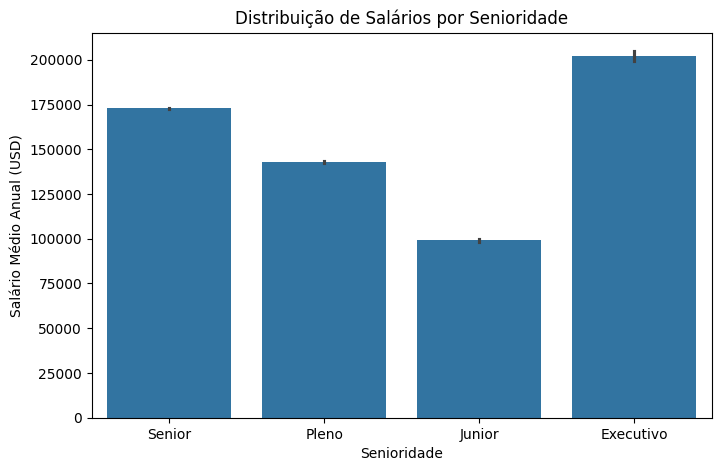

In [ ]:
# Usando a Matplotlib para definir o tamanho da imagem
plt.figure(figsize=(8,5))

#Usando a seaborn para gerar a imagem
sns.barplot(data = df_limpo, x='senioridade', y='usd')

#Definindo o título
plt.title("Distribuição de Salários por Senioridade")

#Definindo os nomes de x e y do gráfico
plt.xlabel("Senioridade")
plt.ylabel("Salário Médio Anual (USD)")

#Apenas mostrando a imagem
plt.show()

In [ ]:
#Agrupando as informações para facilitar a visualização

In [ ]:
#Agrupando com o .groupby
#Agrupando os valores ['usd]'
# .mean -> Calcula a média
# .sort_values(ascending=False) -> Método para fazer a ordenação, do min para o maior
df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=True)

,usd
senioridade,
Junior,99034.963267
Pleno,143044.845979
Senior,172850.838301
Executivo,202027.667813


In [ ]:
#Usar o .index faz com que junte toda a informação e anexe na variável "ordem"
ordem = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=True).index
ordem

Index(['Junior', 'Pleno', 'Senior', 'Executivo'], dtype='object', name='senioridade')

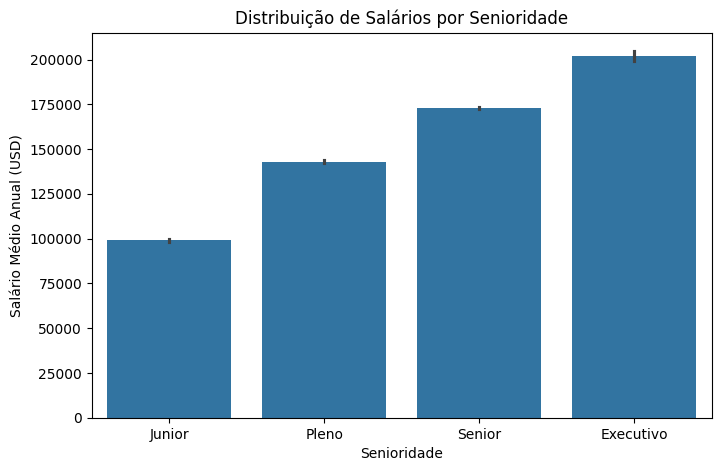

In [ ]:
#Gerando a imagem já tratada com o ordenamento correto!!!

plt.figure(figsize=(8,5))

#Usando o ordeanamento criado para definir a visualização do gráfico (order = ordem)
sns.barplot(data = df_limpo, x='senioridade', y='usd', order=ordem)

plt.title("Distribuição de Salários por Senioridade")

plt.xlabel("Senioridade")
plt.ylabel("Salário Médio Anual (USD)")

plt.show()

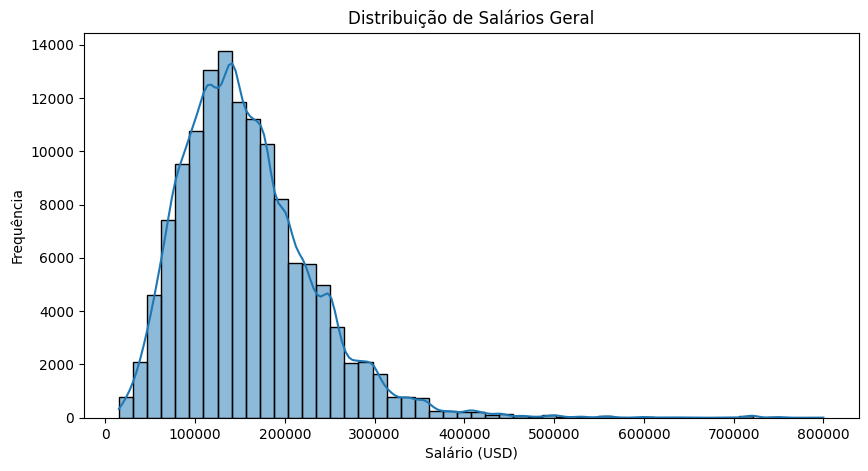

In [ ]:
# Fazendo um histograma #

#Definindo o tamanho da imagem
plt.figure(figsize=(10,5))

#.histplot -> Gera o gráfico histograma
#.bins -> Define os valores de 50 em 50
#.kde -> Linha que é traçada no gráfico, pode ser True ou False
sns.histplot(df_limpo['usd'], bins = 50, kde=True)

#Informações visuais do gráfico
plt.title("Distribuição de Salários Geral")
plt.xlabel("Salário (USD)")
plt.ylabel("Frequência")
plt.show()

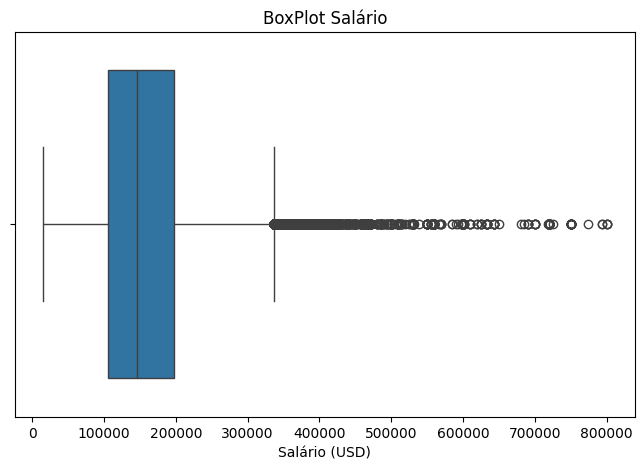

In [ ]:
#Fazendo um Gráfico BoxPlot #

#Tamanho da imagem
plt.figure(figsize=(8,5))

#Chamando a função .boxplot
sns.boxplot(x = df_limpo['usd'])

#Informações visuais do gráfico
plt.title("BoxPlot Salário")
plt.xlabel("Salário (USD)")
plt.show()

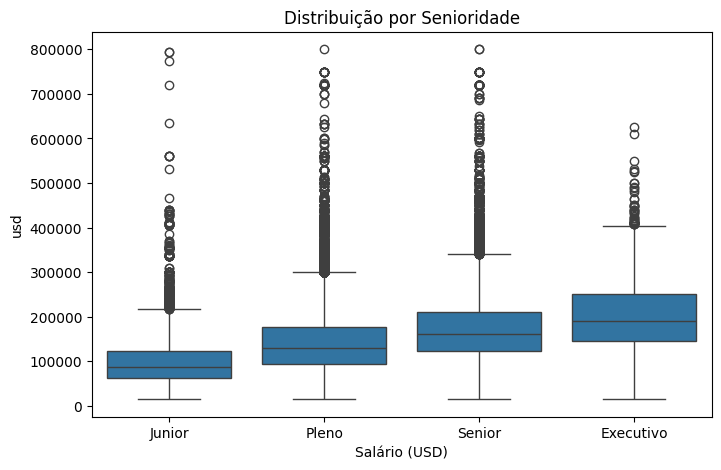

In [ ]:
#Fazendo a quebra por Senioridade
ordem_senioridade = ['Junior','Pleno','Senior','Executivo']

plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='usd', data = df_limpo, order = ordem_senioridade)
plt.title("Distribuição por Senioridade")
plt.xlabel("Salário (USD)")
plt.show()

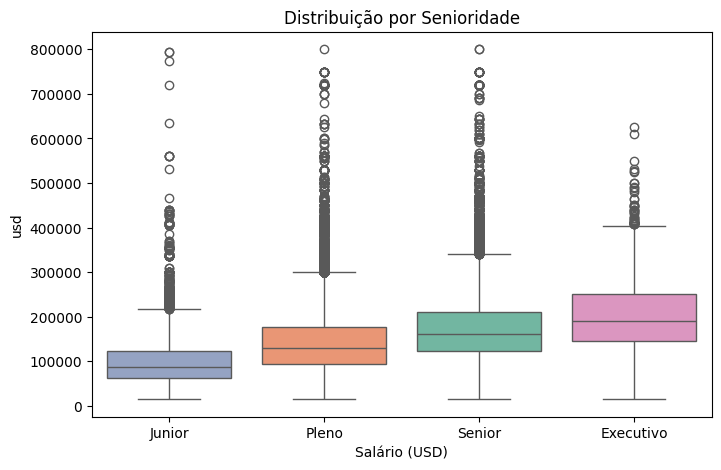

In [ ]:
#Colocando Cores no Gráfico (palette)
# Para a função de cores do Palette funcionar precisa estar acompanhado pelo hue
ordem_senioridade = ['Junior','Pleno','Senior','Executivo']

plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='usd', data = df_limpo, order = ordem_senioridade, palette='Set2', hue='senioridade')
plt.title("Distribuição por Senioridade")
plt.xlabel("Salário (USD)")
plt.show()

In [ ]:
#Biblioteca para Interatividade Plotly
import plotly.express as px


In [ ]:
import plotly.express as px

# Agrupando os dados para calcular a média salarial por senioridade
df_salario_senioridade = df_limpo.groupby('senioridade')['usd'].mean().reset_index()

# Definindo a ordem correta para a senioridade
ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']
df_salario_senioridade['senioridade'] = pd.Categorical(df_salario_senioridade['senioridade'], categories=ordem_senioridade, ordered=True)
df_salario_senioridade = df_salario_senioridade.sort_values('senioridade')

# Criando o gráfico de barras interativo com Plotly Express
fig = px.bar(
    df_salario_senioridade,
    x='senioridade',
    y='usd',
    title='Média Salarial por Nível de Senioridade',
    labels={'senioridade': 'Nível de Senioridade', 'usd': 'Salário Médio Anual (USD)'},
    color='senioridade', # Adiciona cores diferentes para cada senioridade
    color_discrete_sequence=px.colors.qualitative.Set2 # Escolhe uma paleta de cores
)

fig.update_layout(
    xaxis_title='Senioridade',
    yaxis_title='Salário Médio Anual (USD)',
    hovermode='x unified' # Melhora a interatividade do hover
)

fig.show()

In [ ]:
# Contando a frequencia do tipo de trabalho (Remoto)
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()

# Definindo as colunas dessa variável
remoto_contagem.columns = ['Tipo de Trabalho', 'Quantidade']

# Definindo as informações do gráfico (Pizza -> px.pie)
fig = px.pie(remoto_contagem,
             names = 'Tipo de Trabalho',
             values = 'Quantidade',
             title = 'Porporção de Tipo de Trabalho'
)
fig.show()

In [ ]:
# Contando a frequencia do tipo de trabalho (Remoto)
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()

# Definindo as colunas dessa variável
remoto_contagem.columns = ['Tipo de Trabalho', 'Quantidade']

# Definindo as informações do gráfico (Pizza -> px.pie) + hole (Buraco)
fig = px.pie(remoto_contagem,
             names = 'Tipo de Trabalho',
             values = 'Quantidade',
             title = 'Porporção de Tipo de Trabalho',
             #Hole define o tamanho do burado
             hole = 0.5
)
#.update_traces faz a adição de porcentagens dentro do gráfico
fig.update_traces(textinfo='percent+label')
fig.show()

Aula 04 - Contruindo um Dashboard Interativo

In [ ]:
#Transforma o banco df_limpo em um arquivo CSV
df_limpo.to_csv('dados-imersao-final.csv', index=False)
